# Problem 1

## Step 1: Understanding the dataset

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
diabetes_data=pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/Week 4/diabetes.csv')
diabetes_data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [3]:
diabetes_data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [4]:
missing_data=diabetes_data.isnull().sum()/len(diabetes_data)*100
missing_data

,0
Pregnancies,0.0
Glucose,0.0
BloodPressure,0.0
SkinThickness,0.0
Insulin,0.0
BMI,0.0
DiabetesPedigreeFunction,0.0
Age,0.0
Outcome,0.0


### Creating a Feature Matrix and Label Vector and Splitting Train - Test Split

In [5]:
X=diabetes_data.drop(columns=['Outcome']).values #Feature Matrix
y=diabetes_data['Outcome'].values #Target Array
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [6]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [7]:
def train_test_split(X,y,test_size=0.3,random_seed=42):
  np.random.seed(random_seed)
  indices=np.arange(X.shape[0])
  np.random.shuffle(indices)
  test_split_size=int(len(X)*test_size)
  test_indices=indices[:test_split_size]
  train_indices=indices[test_split_size:]
  X_train,X_test,y_train,y_test=X[train_indices],X[test_indices],y[train_indices],y[test_indices]
  return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_seed=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


## Step 2: Computing Euclidean Distance Metrics

In [8]:
def euclidean_distance(point1,point2):
  if point1.shape!=point2.shape:
    raise ValueError("Points must have the same dimensions to calculate Eucledian distance")
  distance=np.sqrt(np.sum((point1-point2)**2))
  return distance

In [9]:
# Test case for the function
try:
  point1 = np.array([3, 4])
  point2 = np.array([0, 0])
  result = euclidean_distance(point1, point2)
  expected_result = 5.0
  assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"
  print("Test passed successfully!")
except ValueError as ve:
  print(f"ValueError: {ve}")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Test passed successfully!


## Step - 3 - Implementation of core k-NN algorithm:

In [11]:
# Function for KNN prediction for a single query
def knn_predict_single(query,X_train,y_train,k=3):
  distances=[euclidean_distance(query,x) for x in X_train]
  sorted_indices=np.argsort(distances)
  nearest_indices=sorted_indices[:k]
  nearest_labels=y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

In [12]:
# Function to test KNN for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

In [13]:
try:
  # Define the test set for the test case
  X_test_sample = X_test[:5] # Taking a small subset for testing
  y_test_sample = y_test[:5] # Corresponding labels for the subset
  # Make predictions
  predictions = knn_predict(X_test_sample, X_train, y_train, k=3)
  # Print test results
  print("Predictions:", predictions)
  print("Actual labels:", y_test_sample)
  # Check if predictions match expected format
  assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
  print("Test case passed successfully!")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Predictions: [0 1 0 1 1]
Actual labels: [0 0 0 0 0]
Test case passed successfully!


## Step-4- Computing Accuracy

In [14]:
# Function to compute accuracy of predictions
def compute_accuracy(y_true, y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

In [15]:
# Perform prediction on the entire test set
try:
  # Make predictions on the entire test set
  predictions = knn_predict(X_test, X_train, y_train, k=3)
  # Compute the accuracy
  accuracy = compute_accuracy(y_test, predictions)
  # Print the accuracy
  print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
  print(f"An unexpected error occurred during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 67.39%


## Step-5-Experiment with different values of k

In [19]:
# Function to test KNN on different values of k and plot the accuracies
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
  accuracies = {}
  for k in k_values:
    # Make predictions using the current value of k
    predictions = knn_predict(X_test, X_train, y_train, k=k)
    # Compute the accuracy
    accuracy = compute_accuracy(y_test, predictions)
    accuracies[k] = accuracy
    print(f"Accuracy for k={k}: {accuracy:.2f}%")
    # Plot the accuracies
  plt.figure(figsize=(10, 5))
  plt.plot(k_values, list(accuracies.values()), marker='o')
  plt.xlabel('k (Number of Neighbors)')
  plt.ylabel('Accuracy (%)')
  plt.title('Accuracy of KNN with Different Values of k')
  plt.grid(True)
  plt.show()
  return accuracies

Accuracy for k=1: 68.70%
Accuracy for k=2: 72.61%
Accuracy for k=3: 67.39%
Accuracy for k=4: 72.17%
Accuracy for k=5: 68.70%
Accuracy for k=6: 70.00%
Accuracy for k=7: 69.13%
Accuracy for k=8: 71.30%
Accuracy for k=9: 70.00%
Accuracy for k=10: 71.74%
Accuracy for k=11: 73.04%
Accuracy for k=12: 73.91%
Accuracy for k=13: 74.35%
Accuracy for k=14: 72.61%
Accuracy for k=15: 73.91%
Accuracy for k=16: 73.48%
Accuracy for k=17: 72.61%
Accuracy for k=18: 71.30%
Accuracy for k=19: 72.17%
Accuracy for k=20: 70.87%


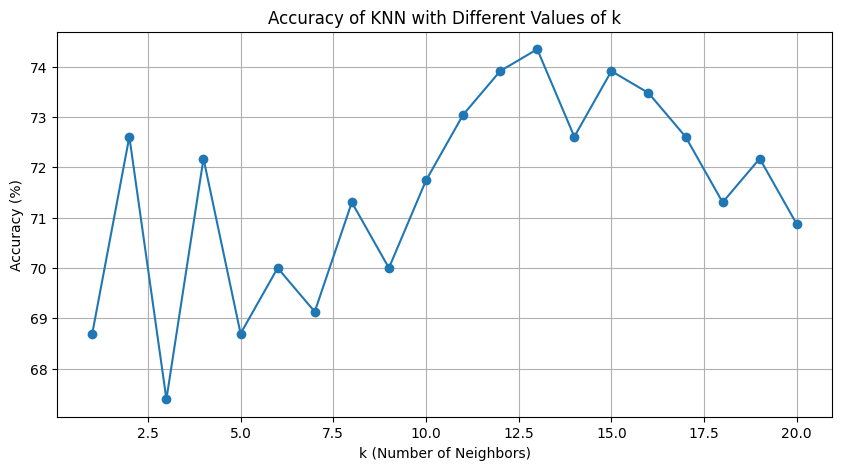

Experiment completed. Check the plot for the accuracy trend.


In [20]:
# Define the range of k values to experiment with
k_values = range(1, 21) # You can adjust this range as needed
# Run the experiment
try:
  accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
  print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
  print(f"An unexpected error occurred during the experiment: {e}")

# Problem 2

In [21]:
#Scaling the feature matrix X using min max scaling
X_train_scaled=(X_train-np.min(X_train,axis=0))/(np.max(X_train,axis=0)-np.min(X_train,axis=0))
X_test_scaled=(X_test-np.min(X_train,axis=0))/(np.max(X_train,axis=0)-np.min(X_train,axis=0))
k=3
predictions_unscaled=knn_predict(X_test,X_train,y_train,k)
predictions_scaled=knn_predict(X_test_scaled,X_train_scaled,y_train,k)
accuracy_unscaled=compute_accuracy(y_test,predictions_unscaled)
accuracy_scaled=compute_accuracy(y_test,predictions_scaled)
print("Accuracy for unscaled data:",accuracy_unscaled)
print("Accuracy for scaled data:",accuracy_scaled)

Accuracy for unscaled data: 67.3913043478261
Accuracy for scaled data: 71.30434782608695


After scaling, the accuracy increased. It prevents features with larger magnitudes from dominating the distance calculations and creating biases.
<br>
Feature scaling transforms the features to a comparable range or scale which increases the accuracy of prediction.

For example: If we have two columns named age and Salary (in the code cell below), and we have to calculate distance between these two features to calulate their similarity

In [48]:
sal=pd.DataFrame({'Age': [20, 21,30],'Salary(in k)': [60, 80,100]})
sal

,Age,Salary(in k)
0,20,60
1,21,80
2,30,100


without scaling, the differences are<br> $\sqrt{(60-80)^{2}+(20-21)^{2}}$ = 20.02 <br>
$\sqrt{(60-100)^{2}+(20-30)^{2}}$ = 41.23


In [49]:
sal_scaled=(sal-np.min(sal,axis=0))/(np.max(sal,axis=0)-np.min(sal,axis=0))
sal_scaled

,Age,Salary(in k)
0,0.0,0.0
1,0.1,0.5
2,1.0,1.0


After scaling, the differences are<br> $\sqrt{(0-0.5)^{2}+(0-0.1)^{2}}$ = 0.51 <br>
$\sqrt{(0-1)^{2}+(0.5-1)^{2}}$ = 1.12<br>
Because of scaling, every feature will contribute equally to result


# Problem 3

In [52]:
#Function for storing accuracies and time taken for making predictions
def exp_knn_values(X_train,y_train,X_test,y_test,k_values):
  accuracies=[]
  time_taken=[]
  for k in k_values:
    start_time=time()
    predictions=knn_predict(X_test,X_train,y_train,k)
    end_time=time()
    accuracy=compute_accuracy(y_test,predictions)
    accuracies.append(accuracy)
    time_taken.append(end_time-start_time)
  return accuracies,time_taken

In [53]:
k=range(1,16)
accuracies_unscaled,time_taken_unscaled=exp_knn_values(X_train,y_train,X_test,y_test,k)
accuracies_scaled,time_taken_scaled=exp_knn_values(X_train_scaled,y_train,X_test_scaled,y_test,k)

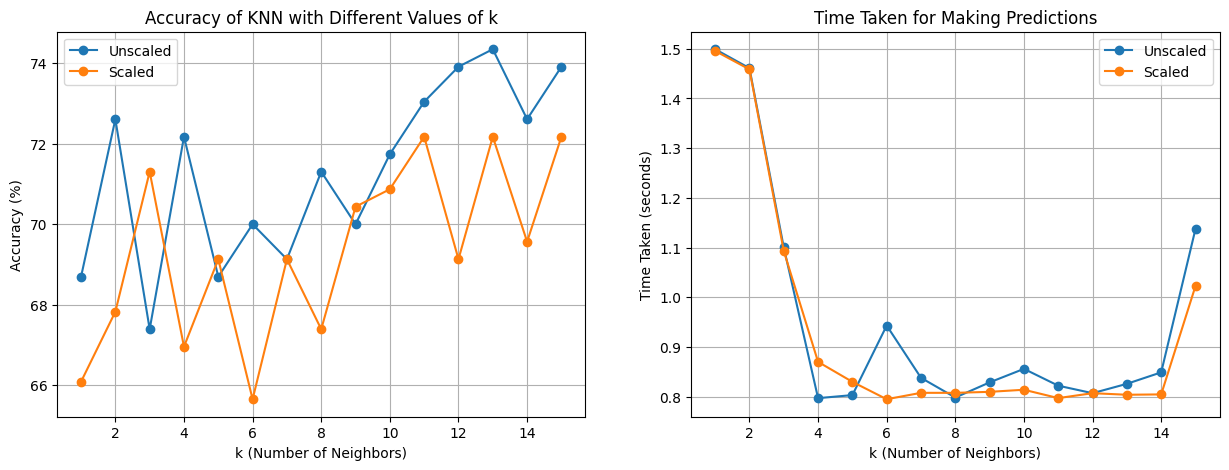

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(k,accuracies_unscaled,marker='o',label='Unscaled')
plt.plot(k,accuracies_scaled,marker='o',label='Scaled')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of KNN with Different Values of k')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(k,time_taken_unscaled,marker='o',label='Unscaled')
plt.plot(k,time_taken_scaled,marker='o',label='Scaled')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken for Making Predictions')
plt.legend()
plt.grid(True)

Smaller choice of k results in Overfitting. When k is small, the algorithm only consider few neighbours to make predictions. Due to this, when the model becomes too complex it may not genralize well to unseen data, leading to poor accuracy.
<br>
Larger choice of k results in Underfitting. When k is large, the algorithm considers a larger number of neighbours. When the model becomes too simple, it might fail to capture the underlying patterns in the data.

### Optimal k?

Odd k is optimal for the problem. For example: If the k is 3 for the diabetes case above, it chooses 3 nearest neighbours. All 3 can be 1(diabetes is present) or 0(no diabetes). Other cases will have one higher occurence than the other, like (1,0,1),(0,0,1). There will always be a majority class and this prevents ties.

Accuracy for k=1: 68.70%
Accuracy for k=2: 72.61%
Accuracy for k=3: 67.39%
Accuracy for k=4: 72.17%
Accuracy for k=5: 68.70%
Accuracy for k=6: 70.00%
Accuracy for k=7: 69.13%
Accuracy for k=8: 71.30%
Accuracy for k=9: 70.00%
Accuracy for k=10: 71.74%


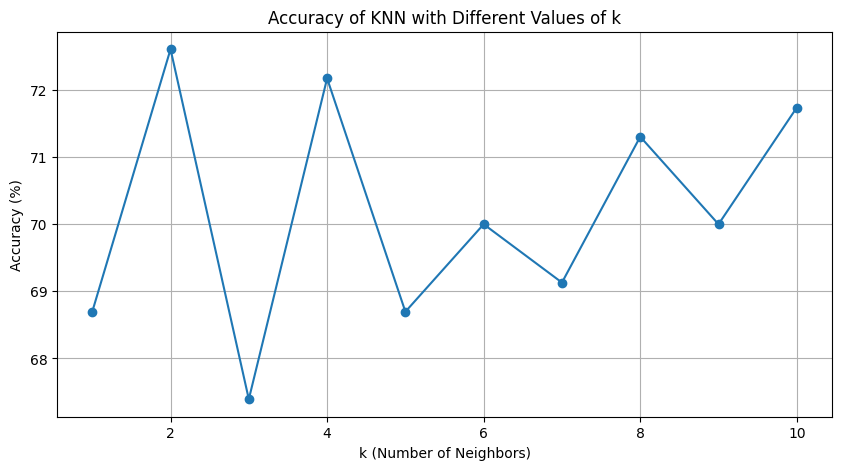

In [61]:
#For finding optimal k
k=range(1,11)
accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k)

Accuracy for k=40: 72.17%
Accuracy for k=41: 74.35%
Accuracy for k=42: 73.48%
Accuracy for k=43: 74.78%
Accuracy for k=44: 72.61%
Accuracy for k=45: 74.35%
Accuracy for k=46: 74.35%
Accuracy for k=47: 73.91%
Accuracy for k=48: 73.48%
Accuracy for k=49: 75.22%
Accuracy for k=50: 73.91%
Accuracy for k=51: 73.91%
Accuracy for k=52: 73.48%
Accuracy for k=53: 73.91%
Accuracy for k=54: 73.48%
Accuracy for k=55: 73.48%
Accuracy for k=56: 72.61%
Accuracy for k=57: 73.48%
Accuracy for k=58: 73.04%
Accuracy for k=59: 73.48%


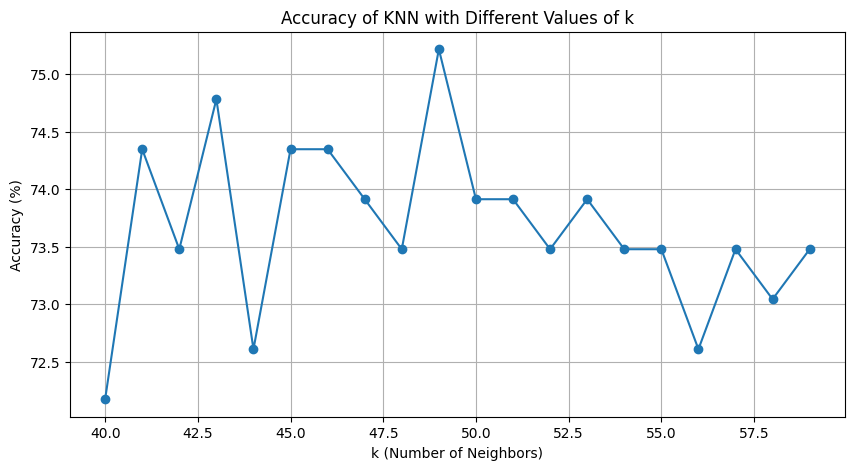

In [62]:
k=range(40,60)
accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k)

Accuracy for k=90: 73.48%
Accuracy for k=91: 72.17%
Accuracy for k=92: 73.04%
Accuracy for k=93: 72.61%
Accuracy for k=94: 72.61%
Accuracy for k=95: 72.17%
Accuracy for k=96: 71.74%
Accuracy for k=97: 71.74%
Accuracy for k=98: 71.30%
Accuracy for k=99: 71.30%
Accuracy for k=100: 71.30%
Accuracy for k=101: 71.30%


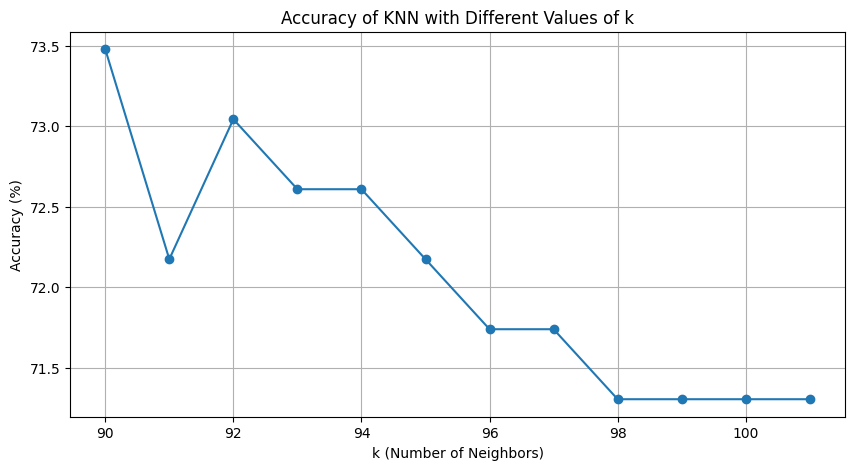

In [63]:
k=range(90,102)
accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k)

For the first experiment with range(1,11), the maximum accuracy is around 72.<br>
For the second experiment with range(40,60),it is observed from the line plot that the maximum accuracy of 75 is achieved between 47-50, then the peak declines.<br>
In the third experiment, the maximum accuracy is 73.5 and the accuracy declines on every increase in k. <br>
So from these 3 samples, the optimal value of k might be an odd value between 47-50